In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [2]:
pip install scikit-lego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from termcolor import colored
from scipy import stats
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklego.mixture import BayesianGMMClassifier, GMMClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')

In [5]:
df. describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [6]:
df.isnull().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

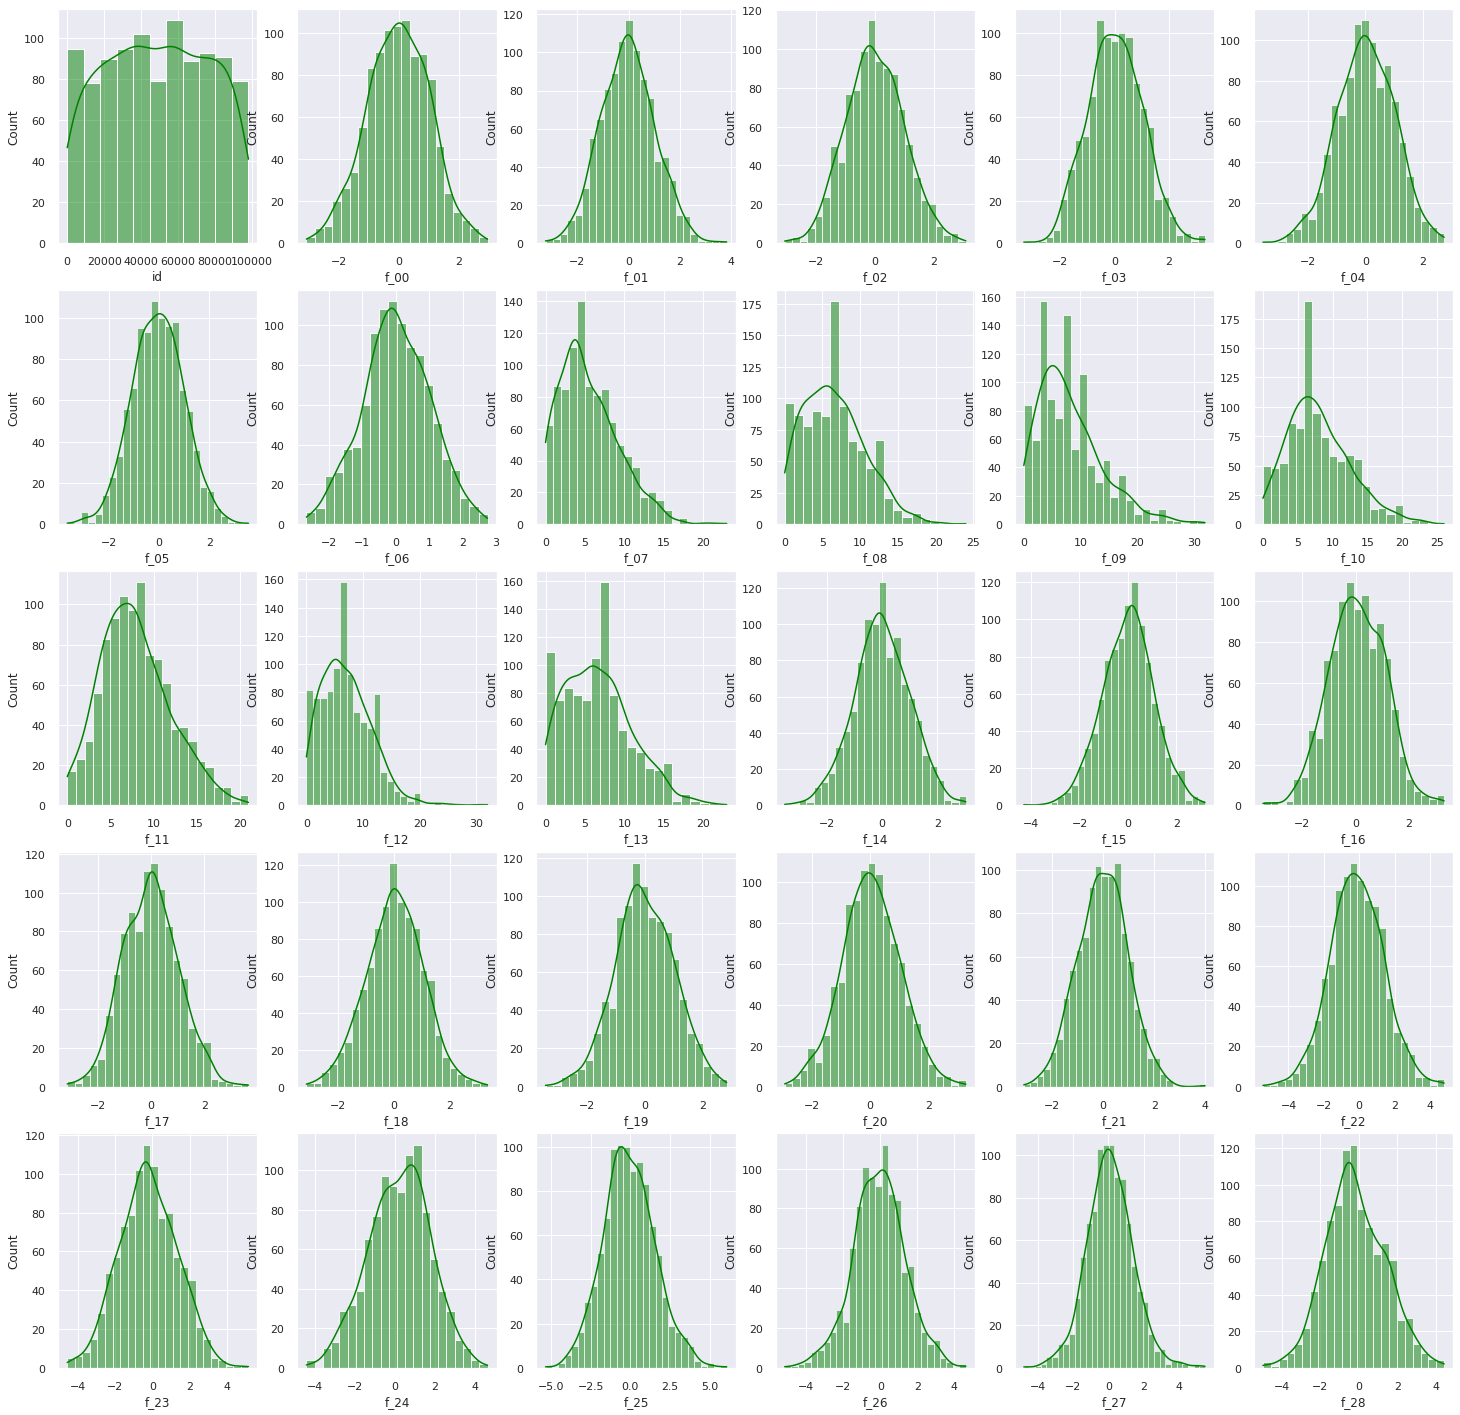

In [7]:
sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(5,6,i)
    p=sns.histplot(x=column,data=df.sample(1000),stat='count',kde=True,color='green')

In [8]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [9]:
df=df.drop('id',axis=1)

In [10]:
dff = df.copy()
dffs = MaxAbsScaler().fit_transform(dff)
dffs_ = PowerTransformer().fit_transform(dffs)

power_features =[ 'f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22','f_23', 'f_24','f_25','f_26','f_27','f_28']

dffs_ = pd.DataFrame(dffs_, columns=dff.columns)

In [11]:
dffs_

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389214,-0.917595,0.648026,0.590794,-0.824839,0.734726,2.258634,-1.025849,1.416210,1.104639,...,-0.472796,-0.753837,-0.763138,-0.707687,0.911286,-0.678769,0.768872,0.960589,1.044229,0.693363
1,-0.688343,-0.458551,0.653256,0.995491,-1.644095,0.864904,-0.085610,-1.025849,-0.917129,-0.219888,...,-0.423449,-0.088090,-1.778004,-0.535924,0.453141,1.031995,-0.120019,-0.551558,0.367193,-1.632988
2,0.805736,0.319496,-1.167199,-0.622338,0.108418,0.785046,1.990036,0.000862,1.044870,-0.453010,...,-0.408275,-1.598766,1.194129,2.204238,0.086137,-1.518918,-0.568980,0.979203,-0.925330,-2.295500
3,-0.500449,0.224093,0.262979,0.234051,0.417077,-1.218870,0.144455,0.285546,-1.235141,0.979536,...,0.620343,1.283814,0.533013,0.731742,-1.217743,0.826924,-1.171309,-0.396198,-0.101020,0.323597
4,-0.670402,-1.044451,-0.270555,-1.833519,-0.285916,-1.849552,0.787766,0.786547,0.175188,-0.453010,...,-1.615251,-0.432316,0.322156,0.227003,-1.481657,0.848441,-0.614021,1.165287,-0.374743,-1.156993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.236090,1.648820,-0.688289,0.316108,-0.294819,0.330327,1.611017,0.000862,0.175188,0.192392,...,-0.285507,-0.255894,-0.972327,0.953666,0.407148,1.284268,-0.077663,-0.989422,0.166338,0.457077
97996,0.320937,0.704710,0.561603,-1.322057,-0.353300,0.183266,0.184235,-0.651268,0.633441,-1.285728,...,0.120435,1.383688,0.342091,1.160290,-0.429981,0.271377,0.784262,0.140360,0.693639,0.638477
97997,-0.249510,-0.464142,1.889491,-1.340744,0.197732,-0.557804,-0.375800,0.786547,0.633441,0.543752,...,-0.842363,-1.784109,-1.265335,-0.994906,1.450956,0.867559,0.178499,1.541355,1.180404,0.583292
97998,0.309684,2.175086,0.760609,0.438870,0.466890,0.063617,-0.329863,-1.438508,0.410645,0.700049,...,-0.007552,1.115833,1.571433,0.276960,0.512080,0.687810,-0.287849,-1.084754,-0.538573,0.125657


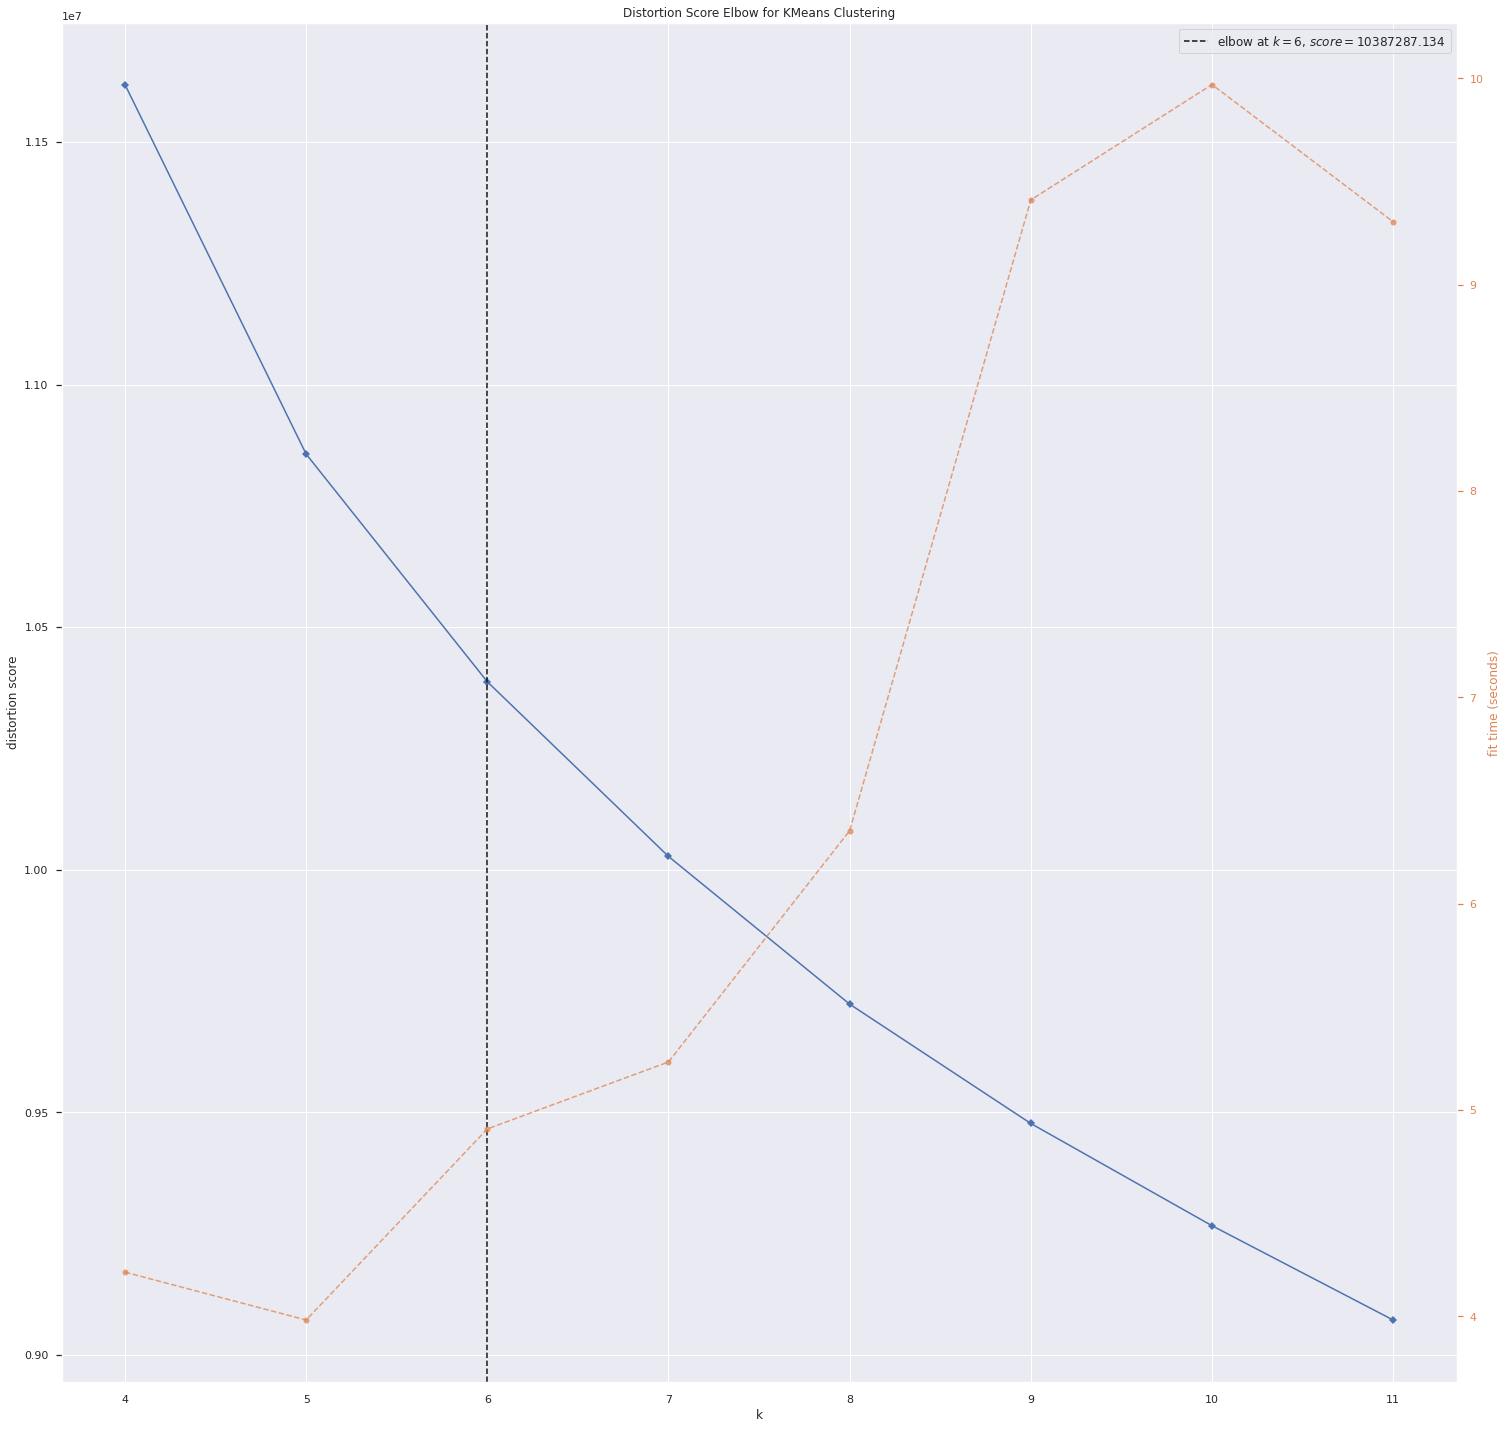

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df)     
visualizer.show()  

In [13]:
dffs_
# Test Data for predictions later
test_data = dffs_[power_features].copy()

In [14]:
%%time
# Fit Bayesian Gaussian Mixture
print("Fitting Bayesian Gaussian Mixture..")
bgm = BayesianGaussianMixture(
    n_components=7,
    max_iter=100,
    n_init=10,
    random_state=2,
    verbose_interval=100,
)

bgm_labels = bgm.fit_predict(dffs_[power_features])
bgm_proba = bgm.predict_proba(dffs_[power_features])

Fitting Bayesian Gaussian Mixture..
CPU times: user 18min 43s, sys: 11min 15s, total: 29min 58s
Wall time: 7min 39s


In [15]:
%%time
# Using idea from: https://www.kaggle.com/code/adaubas/tps-jul22-lgbm-extratree-qda-soft-voting

# Creating Best data based on predicted probability of BGM model
n_components = 7
dffs_["predict"] = bgm_labels
dffs_["predict_proba"] = 0

for n in range(n_components):
    dffs_[f"bgm_proba_{n}"] = bgm_proba[:, n]
    dffs_.loc[dffs_.predict == n, "bgm_proba"] = dffs_[
        f"bgm_proba_{n}"
    ]

train_index = np.array([])
for n in range(n_components):
    median = dffs_[dffs_.predict == n]["bgm_proba"].median()

    # Experiment with different thresholds
    # Higher thereshold might overfit
    n_inx = dffs_[
        (dffs_.predict == n) & (dffs_.bgm_proba > 0.675)
    ].index

    train_index = np.concatenate((train_index, n_inx))
    print(
        f"class:{n}",
        f"median: {round(median,4)}",
        "Training data:"
        + str(round(len(n_inx) / len(dffs_[(dffs_.predict == n)]), 2) * 100)
        + "%",
    )


print(f"\nSize of Training data : {len(train_index)}")

class:0 median: 0.9445 Training data:82.0%
class:1 median: 0.9824 Training data:90.0%
class:2 median: 0.9207 Training data:81.0%
class:3 median: 0.8861 Training data:76.0%
class:4 median: 0.864 Training data:75.0%
class:5 median: 0.9213 Training data:79.0%
class:6 median: 0.755 Training data:61.0%

Size of Training data : 76416
CPU times: user 181 ms, sys: 15.9 ms, total: 197 ms
Wall time: 196 ms


In [16]:
X = dffs_.loc[train_index][power_features]
y = dffs_.loc[train_index]["predict"]

In [17]:
%%time
# https://www.kaggle.com/code/karlcini/bayesiangmmclassifier

bgm = BayesianGMMClassifier(
    n_components=7,
    random_state=42,
    # tol =1e-3,
    covariance_type="full",
    max_iter=100,
    n_init=7,
    init_params="kmeans", # you can use k-means++
)
bgm.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 7 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 7 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


CPU times: user 15min 30s, sys: 13min 43s, total: 29min 13s
Wall time: 7min 28s


BayesianGMMClassifier(n_components=7, n_init=7, random_state=42)

In [18]:
y_pred = bgm.predict(X)
accuracy_score(y, y_pred)

0.9659757118927973

In [19]:
ss = pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")

In [20]:
predictions = bgm.predict(test_data)
ss["Predicted"] = predictions
ss.to_csv(
    "submission.csv",
    index=False,
)